In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import math
from sklearn import feature_selection
from sklearn.preprocessing import MinMaxScaler

In [2]:
raw_counts = pd.read_csv("../../CAR_data/raw_counts_post_qc_genes_of_interest_celltypes.csv", index_col = 0)
raw_counts

,CAR_Variant,CD28,PI3K,Lck,Grb2,GADS,Akt,ERK12,GSK3b,CD3z,...,RPLP0,B2M,PTPRC,BCL11B,IL2RB,SPI1,RUNX3,index,Type,cell_type
0,h4-1BB_h4-1BB,1.0,2.0,6.0,8.0,2.0,3.0,0.0,1.0,14.0,...,111.0,158.0,4.0,1.0,15.0,0.0,3.0,0,CD8,CD8 Cytox/Memory
1,h4-1BB_hIL15RA,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,10.0,30.0,1.0,0.0,1.0,0.0,0.0,1,CD8,CD8 Effector A
2,hIL15RA_hCD28,0.0,0.0,5.0,4.0,4.0,2.0,1.0,0.0,5.0,...,58.0,156.0,12.0,3.0,11.0,0.0,2.0,2,CD4,CD4 activated
3,hIL15RA_hCTLA-4,0.0,0.0,2.0,2.0,7.0,0.0,1.0,1.0,7.0,...,20.0,113.0,11.0,2.0,4.0,0.0,3.0,3,CD8,CD8 Effector HLAhigh
4,hCTLA-4_hCD40,1.0,0.0,9.0,8.0,10.0,0.0,7.0,0.0,19.0,...,101.0,285.0,40.0,7.0,20.0,0.0,13.0,4,CD4,CD4 activated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,TCR-,0.0,1.0,5.0,1.0,5.0,0.0,3.0,0.0,3.0,...,23.0,99.0,14.0,1.0,4.0,0.0,8.0,4746,CD8,CD8 Effector HLAhigh
4747,TCR-,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,...,6.0,84.0,6.0,3.0,0.0,0.0,2.0,4747,CD8,CD8 Effector HLAhigh
4748,TCR-,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,...,29.0,53.0,8.0,3.0,3.0,0.0,1.0,4748,CD4,CD4 Memory
4749,TCR-,1.0,0.0,8.0,10.0,4.0,0.0,3.0,2.0,9.0,...,99.0,133.0,25.0,2.0,4.0,0.0,11.0,4749,CD8,CD8 Effector HLAhigh


In [3]:
cell_meta = pd.read_csv("../../CAR_data/AD_cell_meta.csv", index_col = 0)
cell_meta

,CAR_Variant,batch,DomainA,DomainB,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,CAR_TCR,S_score,G2M_score,phase,leiden,CAR,dummy_domain,JF_clusters,JF_cell_type,new_clust,cell_type,Type
AAACGAAAGGTAAGGA-1-1,h4-1BB_h4-1BB,1,h4-1BB,h4-1BB,6171,41064.0,2835.0,6.903858,CAR,0.152906,0.505489,G2M,2,rest,rest,4,CD8 Effector B,2,CD8 Cytox/Memory,CD8
AAACGAAGTACGCGTC-1-1,h4-1BB_hIL15RA,1,h4-1BB,hIL15RA,1549,3508.0,62.0,1.767389,CAR,0.235084,0.088364,S,3,rest,rest,5,CD8 Effector A,3,CD8 Effector A,CD8
AAACGCTGTGTTCCAA-1-1,hIL15RA_hCD28,1,hIL15RA,hCD28,4461,18978.0,1213.0,6.391612,CAR,0.141407,-0.006340,S,0,rest,rest,0,CD4 Activated,7,CD4 activated,CD4
AAAGAACGTTACCTTT-1-1,hIL15RA_hCTLA-4,1,hIL15RA,hCTLA-4,4639,16617.0,726.0,4.369020,CAR,0.535891,0.414059,S,1,rest,rest,7,CD8 Effector D,1,CD8 Effector HLAhigh,CD8
AAAGGATAGTCTTCCC-1-1,hCTLA-4_hCD40,1,hCTLA-4,hCD40,7008,55794.0,4685.0,8.396960,CAR,-0.034038,0.793694,G2M,0,rest,rest,0,CD4 Activated,7,CD4 activated,CD4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTTCCTAGCCT-1-TCR,NaN,TCR,NaN,NaN,4796,20248.0,1208.0,5.966022,TCR,-0.015127,0.727930,G2M,1,rest,rest,2,CD8 Resting/Memory,1,CD8 Effector HLAhigh,CD8
TTGTTTGTCTATGCCC-1-TCR,NaN,TCR,NaN,NaN,2195,5223.0,136.0,2.603867,TCR,-0.247658,-0.019484,G1,1,rest,rest,7,CD8 Effector D,1,CD8 Effector HLAhigh,CD8
TTTACCAGTCTGTGAT-1-TCR,NaN,TCR,NaN,NaN,2470,7996.0,477.0,5.965483,TCR,-0.349966,-0.096540,G1,0,rest,rest,1,CD4 Resting/Memory,0,CD4 Memory,CD4
TTTACGTTCACTTTGT-1-TCR,NaN,TCR,NaN,NaN,5879,33731.0,2592.0,7.684326,TCR,0.160244,0.751221,G2M,1,rest,rest,6,CD8 Effector C,1,CD8 Effector HLAhigh,CD8


In [4]:
genes = [c for c in raw_counts.columns]
if "Type" in genes:
    genes.remove("Type")
if "CAR_Variant" in genes:
    genes.remove("CAR_Variant")
if "cell_type" in genes:
    genes.remove("cell_type")

In [5]:
raw_counts.reset_index()
cell_meta.reset_index()


,index,CAR_Variant,batch,DomainA,DomainB,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,CAR_TCR,...,G2M_score,phase,leiden,CAR,dummy_domain,JF_clusters,JF_cell_type,new_clust,cell_type,Type
0,AAACGAAAGGTAAGGA-1-1,h4-1BB_h4-1BB,1,h4-1BB,h4-1BB,6171,41064.0,2835.0,6.903858,CAR,...,0.505489,G2M,2,rest,rest,4,CD8 Effector B,2,CD8 Cytox/Memory,CD8
1,AAACGAAGTACGCGTC-1-1,h4-1BB_hIL15RA,1,h4-1BB,hIL15RA,1549,3508.0,62.0,1.767389,CAR,...,0.088364,S,3,rest,rest,5,CD8 Effector A,3,CD8 Effector A,CD8
2,AAACGCTGTGTTCCAA-1-1,hIL15RA_hCD28,1,hIL15RA,hCD28,4461,18978.0,1213.0,6.391612,CAR,...,-0.006340,S,0,rest,rest,0,CD4 Activated,7,CD4 activated,CD4
3,AAAGAACGTTACCTTT-1-1,hIL15RA_hCTLA-4,1,hIL15RA,hCTLA-4,4639,16617.0,726.0,4.369020,CAR,...,0.414059,S,1,rest,rest,7,CD8 Effector D,1,CD8 Effector HLAhigh,CD8
4,AAAGGATAGTCTTCCC-1-1,hCTLA-4_hCD40,1,hCTLA-4,hCD40,7008,55794.0,4685.0,8.396960,CAR,...,0.793694,G2M,0,rest,rest,0,CD4 Activated,7,CD4 activated,CD4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,TTGTTGTTCCTAGCCT-1-TCR,NaN,TCR,NaN,NaN,4796,20248.0,1208.0,5.966022,TCR,...,0.727930,G2M,1,rest,rest,2,CD8 Resting/Memory,1,CD8 Effector HLAhigh,CD8
4747,TTGTTTGTCTATGCCC-1-TCR,NaN,TCR,NaN,NaN,2195,5223.0,136.0,2.603867,TCR,...,-0.019484,G1,1,rest,rest,7,CD8 Effector D,1,CD8 Effector HLAhigh,CD8
4748,TTTACCAGTCTGTGAT-1-TCR,NaN,TCR,NaN,NaN,2470,7996.0,477.0,5.965483,TCR,...,-0.096540,G1,0,rest,rest,1,CD4 Resting/Memory,0,CD4 Memory,CD4
4749,TTTACGTTCACTTTGT-1-TCR,NaN,TCR,NaN,NaN,5879,33731.0,2592.0,7.684326,TCR,...,0.751221,G2M,1,rest,rest,6,CD8 Effector C,1,CD8 Effector HLAhigh,CD8


In [6]:
raw_counts["batch"] = pd.Series([k for k in cell_meta["batch"]])
raw_counts["batch"] 

0         1
1         1
2         1
3         1
4         1
       ... 
4746    TCR
4747    TCR
4748    TCR
4749    TCR
4750    TCR
Name: batch, Length: 4751, dtype: object

In [7]:
# Batch 1 has about twice as less reads as the other 2, we compensate for this

raw_counts[raw_counts["batch"]==1][genes] = 2*raw_counts[raw_counts["batch"]==1][genes]

In [8]:
def aggregate_data(df, columns):
    """ Return the df of aggregation by columns"""
    return(df.groupby(columns).mean())

In [9]:
bulked_df = aggregate_data(raw_counts, ["cell_type", "CAR_Variant"])
bulked_df = bulked_df.drop("index", axis = 1)

In [10]:
bulked_df

CD28      PI3K        Lck       Grb2  \
cell_type   CAR_Variant                                                 
CD4 HLAhigh TCR-             0.747475  0.616162   7.868687   4.080808   
            h4-1BB_NA        1.526316  1.421053  12.947368   8.105263   
            h4-1BB_h4-1BB    1.200000  0.600000   9.600000   6.200000   
            h4-1BB_hCD28     1.142857  0.857143   8.428571   4.857143   
            h4-1BB_hCD40     0.522727  0.806818   8.647727   5.022727   
...                               ...       ...        ...        ...   
NK T cell   hIL15RA_h4-1BB   1.000000  1.000000  23.000000  15.000000   
            hIL15RA_hCD28    0.000000  1.500000   8.000000   3.500000   
            hIL15RA_hCD40    0.000000  1.000000  13.000000  17.000000   
            hIL15RA_hCTLA-4  0.333333  2.000000  10.000000   8.666667   
            hIL15RA_hIL15RA  0.000000  1.000000   8.500000   5.500000   

                                 GADS       Akt     ERK12     GSK3b  \
cell_type   CAR_Variant                                               
CD4 HLAhigh TCR-             3.838384  0.616162  2.101010  0.707071   
            h4-1BB_NA        4.368421  1.578947  3.578947  0.947368   
            h4-1BB_h4-1BB    3.800000  2.600000  3.400000  0.200000   
            h4-1BB_hCD28     4.142857  0.571429  1.857143  1.214286   
            h4-1BB_hCD40     4.147727  1.045455  2.511364  0.727273   
...                               ...       ...       ...       ...   
NK T cell   hIL15RA_h4-1BB   3.000000  4.000000  6.000000  0.000000   
            hIL15RA_hCD28    3.500000  3.000000  4.500000  2.000000   
            hIL15RA_hCD40    1.000000  0.000000  5.000000  1.000000   
            hIL15RA_hCTLA-4  3.666667  2.000000  5.000000  1.000000   
            hIL15RA_hIL15RA  3.500000  0.500000  2.500000  2.500000   

                                  CD3z     PLCg1  ...        ACTB       RPS18  \
cell_type   CAR_Variant                           ...                           
CD4 HLAhigh TCR-              4.010101  0.797980  ...  268.202020   95.383838   
            h4-1BB_NA         7.526316  1.210526  ...  376.263158  220.473684   
            h4-1BB_h4-1BB     5.400000  0.600000  ...  358.200000  199.800000   
            h4-1BB_hCD28      6.000000  0.785714  ...  245.357143  160.142857   
            h4-1BB_hCD40      6.318182  0.829545  ...  301.511364  142.579545   
...                                ...       ...  ...         ...         ...   
NK T cell   hIL15RA_h4-1BB   25.000000  0.000000  ...  744.000000  311.000000   
            hIL15RA_hCD28    17.500000  1.000000  ...  239.500000  129.500000   
            hIL15RA_hCD40     8.000000  1.000000  ...  580.000000  433.000000   
            hIL15RA_hCTLA-4  19.666667  1.000000  ...  389.666667  203.000000   
            hIL15RA_hIL15RA   8.000000  0.500000  ...  366.000000  168.500000   

                                UBE2D2       RPLP0         B2M      PTPRC  \
cell_type   CAR_Variant                                                     
CD4 HLAhigh TCR-              6.646465   45.939394  142.646465  15.181818   
            h4-1BB_NA        13.105263   94.736842  238.631579  22.315789   
            h4-1BB_h4-1BB    10.600000   93.600000  230.800000  22.800000   
            h4-1BB_hCD28      7.357143   70.071429  189.142857  18.285714   
            h4-1BB_hCD40      8.306818   61.602273  182.147727  17.579545   
...                                ...         ...         ...        ...   
NK T cell   hIL15RA_h4-1BB   22.000000  133.000000  462.000000  45.000000   
            hIL15RA_hCD28    10.500000   71.500000  167.500000  19.000000   
            hIL15RA_hCD40    19.000000  188.000000  464.000000  24.000000   
            hIL15RA_hCTLA-4  13.000000  100.000000  269.666667  25.666667   
            hIL15RA_hIL15RA   5.000000   73.000000  128.500000  15.500000   

                               BCL11B      IL2RB  SPI1      RUNX3  
cell_type   CAR_Variant            

In [11]:
# Depth-normalise the data
from scanpy.pp import normalize_total
from anndata import AnnData

adata = AnnData(bulked_df)

/tmp/ipykernel_1162609/3796758040.py:5: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(bulked_df)


In [12]:
adata.X

array([[ 0.74747473,  0.61616164,  7.8686867 , ...,  3.4343433 ,
         0.        ,  5.090909  ],
       [ 1.5263158 ,  1.4210526 , 12.947369  , ..., 13.052631  ,
         0.        ,  7.894737  ],
       [ 1.2       ,  0.6       ,  9.6       , ..., 15.4       ,
         0.        ,  6.6       ],
       ...,
       [ 0.        ,  1.        , 13.        , ..., 18.        ,
         0.        ,  5.        ],
       [ 0.33333334,  2.        , 10.        , ..., 11.333333  ,
         0.        , 18.666666  ],
       [ 0.        ,  1.        ,  8.5       , ..., 13.        ,
         0.        ,  9.5       ]], dtype=float32)

In [13]:
normalize_total(adata, target_sum=1e4, inplace=True)
adata.X

array([[ 6.908591 ,  5.69492  , 72.72692  , ..., 31.742174 ,  0.       ,
        47.053104 ],
       [ 7.561141 ,  7.039683 , 64.139336 , ..., 64.66079  ,  0.       ,
        39.10935  ],
       [ 6.4350066,  3.2175033, 51.480053 , ..., 82.58258  ,  0.       ,
        35.392536 ],
       ...,
       [ 0.       ,  2.9274004, 38.056206 , ..., 52.693207 ,  0.       ,
        14.637002 ],
       [ 1.3374348,  8.024609 , 40.123043 , ..., 45.47278  ,  0.       ,
        74.89634  ],
       [ 0.       ,  6.205399 , 52.74589  , ..., 80.67019  ,  0.       ,
        58.95129  ]], dtype=float32)

In [14]:
bulked_df = pd.DataFrame(adata.X, columns=bulked_df.columns, index = bulked_df.index)
bulked_df

## The Transcription factors

<Figure size 1080x360 with 0 Axes>

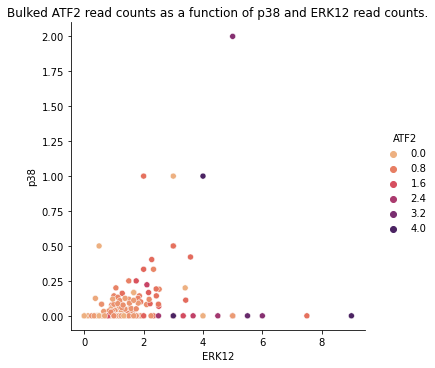

In [15]:
plt.figure(figsize = (15,5))
g = sns.relplot(
    data= bulked_df,
    x="ERK12", y="p38", hue="ATF2",
    #height=5,
    palette="flare")
g.set(title = "Bulked ATF2 read counts as a function of p38 and ERK12 read counts.")

In [16]:

# Kendall's Tau
print(bulked_df["ERK12"].corr(bulked_df["ATF2"]))

# Kendall's Tau
print(bulked_df["p38"].corr(bulked_df["ATF2"]))

0.6149847989457995
0.2985229423960471


## The toy network

<Figure size 1080x360 with 0 Axes>

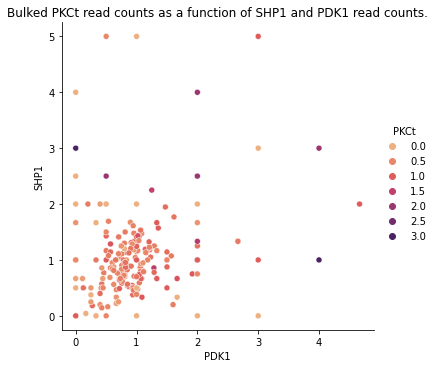

In [17]:
plt.figure(figsize = (15,5))
g = sns.relplot(
    data= bulked_df,
    x="PDK1", y="SHP1", hue="PKCt",
    #height=5,
    palette="flare")
g.set(title = "Bulked PKCt read counts as a function of SHP1 and PDK1 read counts.")

In [18]:

# Kendall's Tau
print(bulked_df["PKCt"].corr(bulked_df["PDK1"]))



# Kendall's Tau
print(bulked_df["PKCt"].corr(bulked_df["SHP1"]))

0.3758001590552369
0.18584600338792084


In [19]:
## Then the other GRN relationships

<Figure size 1080x360 with 0 Axes>

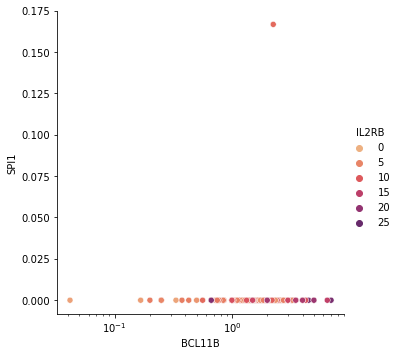

In [20]:
plt.figure(figsize = (15,5))
g = sns.relplot(
    data= bulked_df,
    x="BCL11B", y="SPI1", hue = "IL2RB", 
    height=5,
    palette="flare")
g.set(title = "", xscale = "log")

In [21]:
# Kendall's Tau
print(bulked_df["IL2RB"].corr(bulked_df["SPI1"]))

# Kendall's Tau
print(bulked_df["IL2RB"].corr(bulked_df["BCL11B"]))

-0.008167026190127935
0.2398100344867655


<Figure size 1080x360 with 0 Axes>

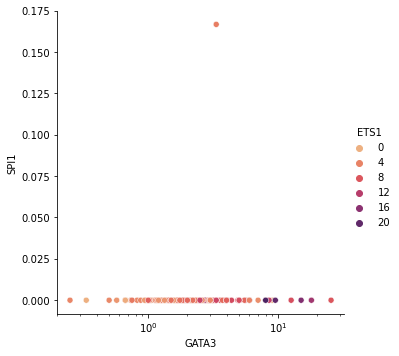

In [22]:
plt.figure(figsize = (15,5))
g = sns.relplot(
    data= bulked_df,
    x="GATA3", y="SPI1", hue = "ETS1", 
    #height=5,
    palette="flare")
g.set(title = "", xscale = "log")

In [23]:
# Kendall's Tau
print(bulked_df["ETS1"].corr(bulked_df["SPI1"]))

# Kendall's Tau
print(bulked_df["ETS1"].corr(bulked_df["GATA3"]))

-0.01290456734756427
0.5060668965585841


# Lck AND Akt inhibit GSK3b

<Figure size 1080x360 with 0 Axes>

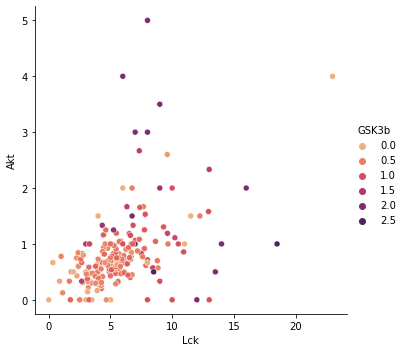

In [24]:
plt.figure(figsize = (15,5))
g = sns.relplot(
    data= bulked_df,
    x="Lck", y="Akt",hue = "GSK3b",
    #height=5,
    palette="flare")
g.set(title = "")

In [25]:
# Kendall's Tau
print(bulked_df["GSK3b"].corr(bulked_df["Akt"]))

# Kendall's Tau
print(bulked_df["GSK3b"].corr(bulked_df["Lck"]))



0.424441873594865
0.4471528200477069


the only place I see a teeny tiny negative correlation is in the GRN

In [26]:
# Save the bulked df for correlation comparisons

bulked_df.to_csv("../../CAR_data/raw_counts_bulked_by_CAR_and_celltype.csv")

# Try regression on the bulked data

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [28]:
TFs = pickle.load(open("../../CAR_data/TF_list", "rb"))

In [29]:
parent_dict = pickle.load(open("../../CAR_data/upstream_node_dict", "rb"))

In [30]:
data_train, data_test = train_test_split(bulked_df, test_size=0.1, random_state=2)

In [31]:
def fit_random_forest(TFs, predictors_dict, expression_train, expression_valid, plot = False):
    """ Fit a random forest to each TF and create a dictionary to save the results."""
    score_dict = {}
    unfit = []
    for tf in TFs:
        print(tf)
        rf = RandomForestRegressor(random_state=2)

        
        try:
            predictors = predictors_dict[tf]
            # Train the forest
            rf.fit(X = expression_train[predictors],
                   y = expression_train[tf])
            
        except BaseException as e:
            print(f"{tf} could not be fit")
            print(e)
            unfit.append(tf)
            continue

        ## For each model that was fit: predict and assess fit on the training and validation set
        ypred_test = rf.predict(expression_valid[predictors])
        ypred_train = rf.predict(expression_train[predictors])



        score_train = r2_score(y_true=expression_train[tf],
                                             y_pred = ypred_train)
        score_test = r2_score(y_true=expression_valid[tf],
                                             y_pred = ypred_test)
        score_dict[tf] = (score_train, score_test)

        if plot:
            plt.figure()
            plt.scatter(x = expression_valid[tf], y = ypred_test)
            X = np.linspace(0,1)
            plt.plot( X, X, "r")
            plt.title( f" TF:{tf}, Train R2:{score_train}, Test R2:{score_test}")
        else:
            print(f" TF:{tf}, Train R2:{score_train}, Test R2:{score_test}")




    return(score_dict, unfit)

ATF1
ATF2
BCL3
CEBPB
CEBPZ
E2F4
ELK1
ELK4
ESR1
ETS1
FOS
FOSL1
FOSL2
GABPA
GATA1
GATA2
HSF1
IRF3
JUN
JUND
MEF2A
MEF2C


/tmp/ipykernel_1162609/1561773449.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


MYC
NANOG
NFAT
NFATC1
REST
RXRA
SP1
STAT1
STAT3
STAT5
TAL1
AP1
AP1 could not be fit
'AP1'
Bcl2
BclXL
GADS
IFNG
IL2
IL6
NFAT
TNFa
cmyc
mTOR


({'ATF1': (0.8890126648925867, 0.33441926781646836),
  'ATF2': (0.6899692955239164, -0.26794634762132263),
  'BCL3': (0.8966728649381627, 0.33822830106534085),
  'CEBPB': (0.6559966950741015, 0.26031125092797724),
  'CEBPZ': (0.8960291351934777, 0.26719425202813896),
  'E2F4': (0.9076513756379966, 0.6915258912332766),
  'ELK1': (0.6680750206060068, 0.35817771475305604),
  'ELK4': (0.8971698587298347, 0.256198808178844),
  'ESR1': (0.8329441588906958, 0.11421628215286816),
  'ETS1': (0.92973340471518, 0.638642933720655),
  'FOS': (0.8383404746749902, -0.08159553594137203),
  'FOSL1': (0.6814139963522639, 0.002692359135697653),
  'FOSL2': (0.8492511130603091, 0.13100902522199642),
  'GABPA': (0.86527161253303, -0.5635830889374125),
  'GATA1': (1.0, 1.0),
  'GATA2': (0.7970881180922272, -0.059450167087855554),
  'HSF1': (0.9165309963146085, 0.5949738488265164),
  'IRF3': (0.9212253450545465, 0.11068478169677087),
  'JUN': (0.8321549039359746, -0.16470045954398072),
  'JUND': (0.8880936437

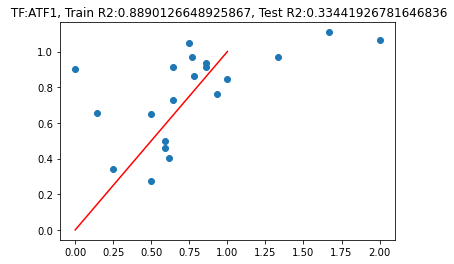

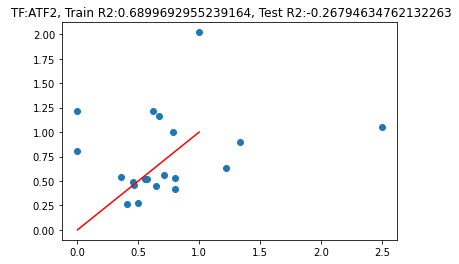

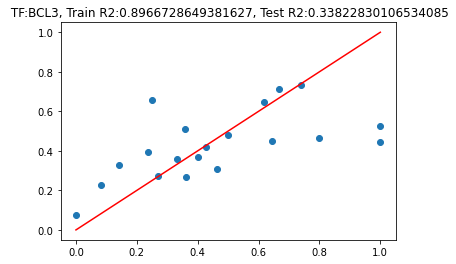

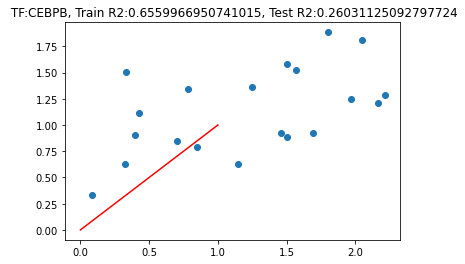

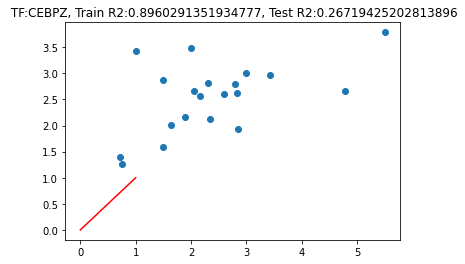

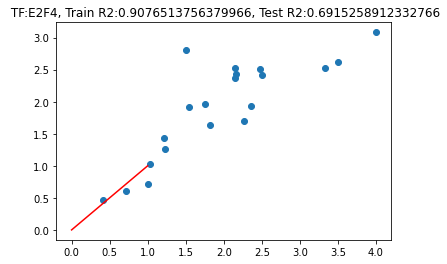

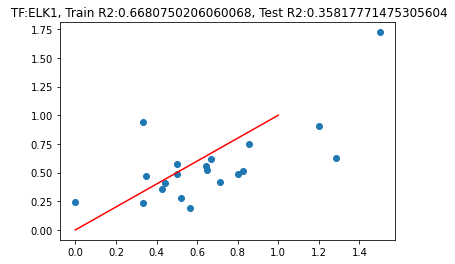

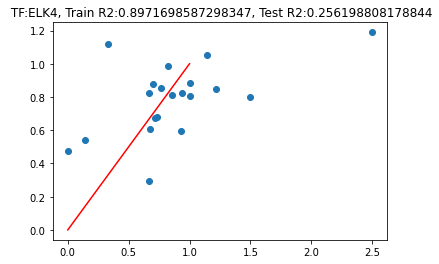

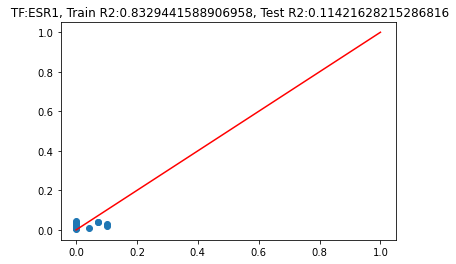

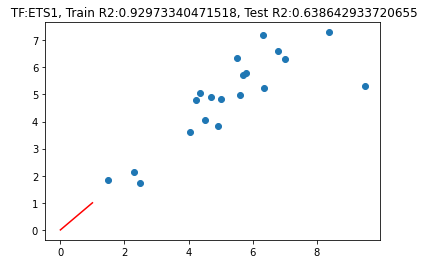

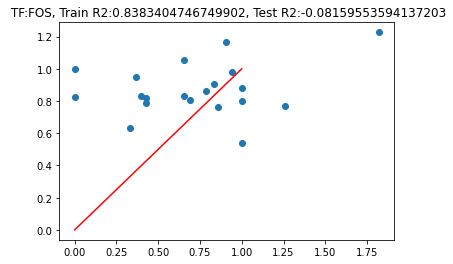

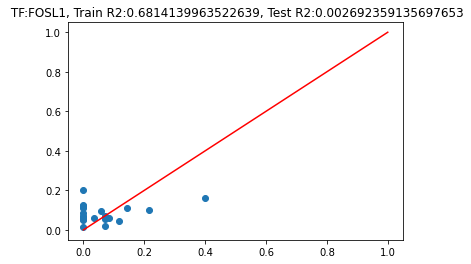

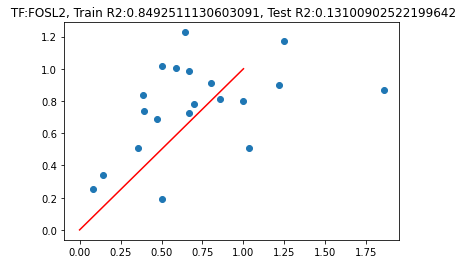

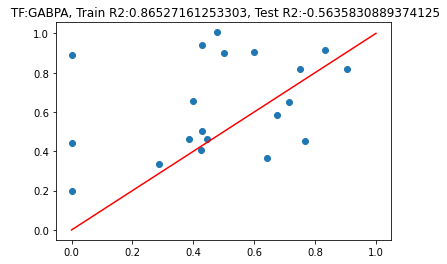

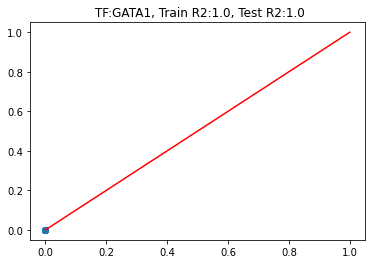

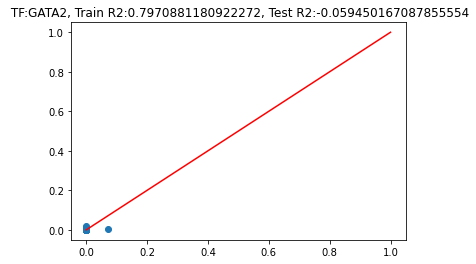

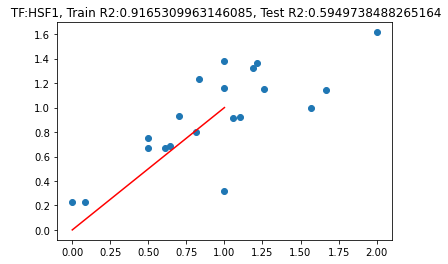

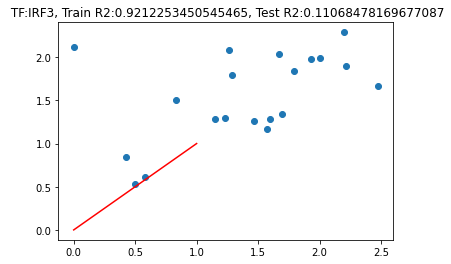

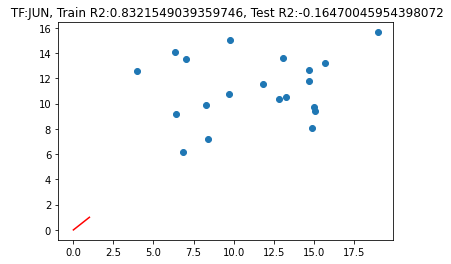

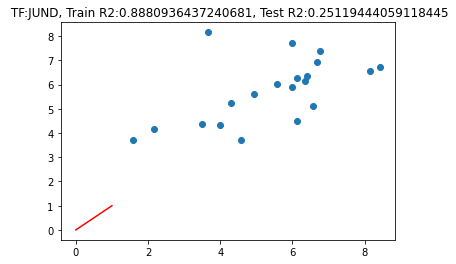

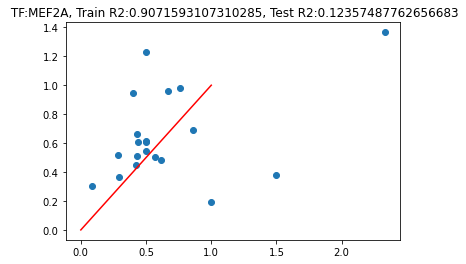

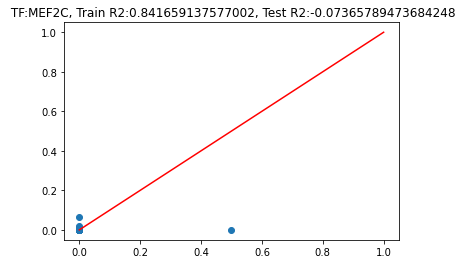

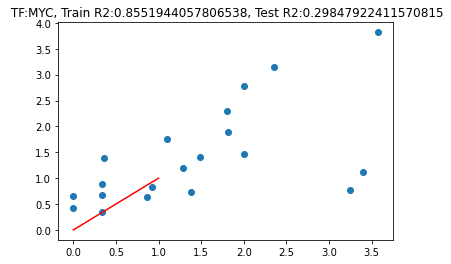

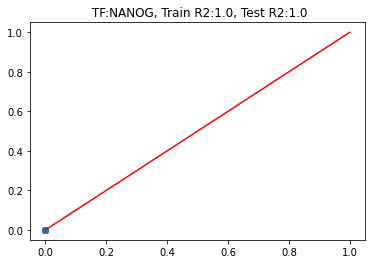

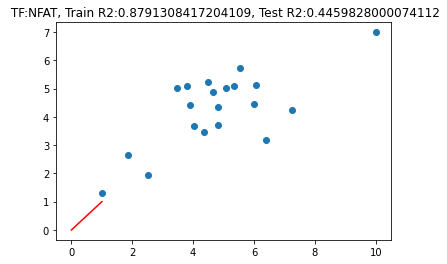

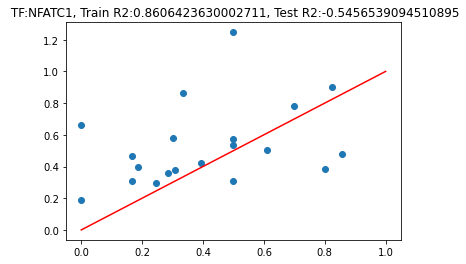

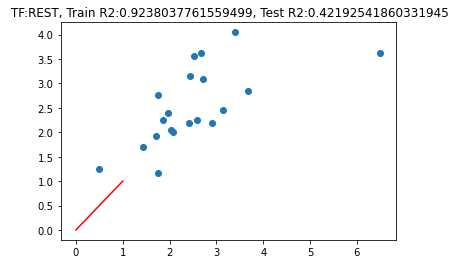

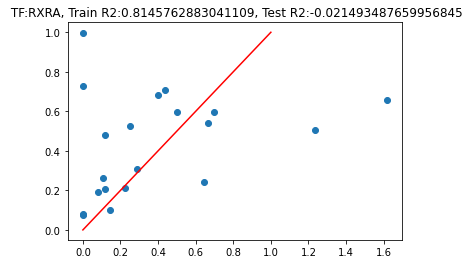

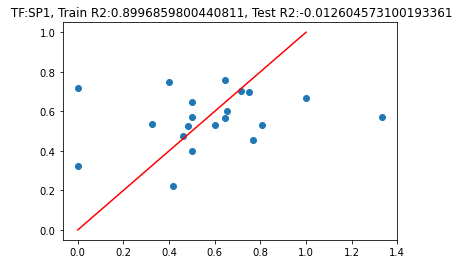

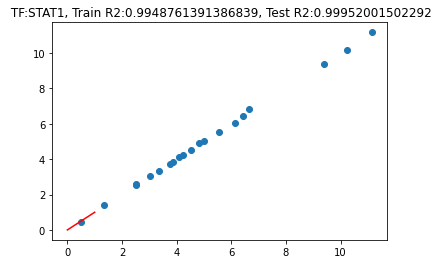

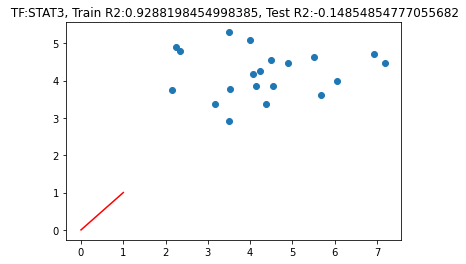

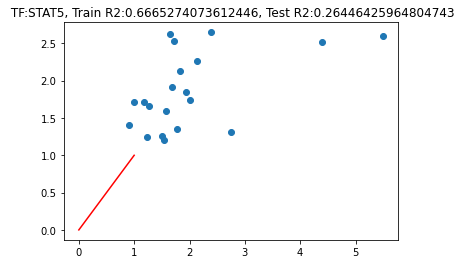

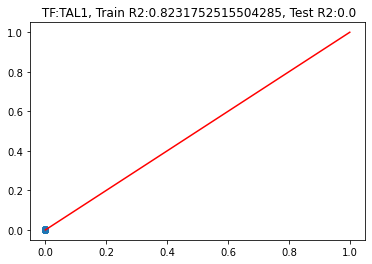

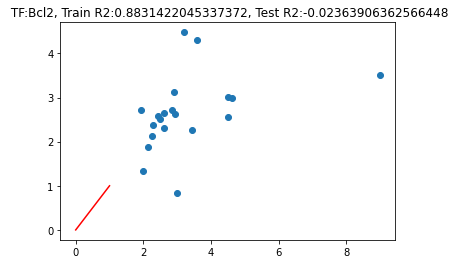

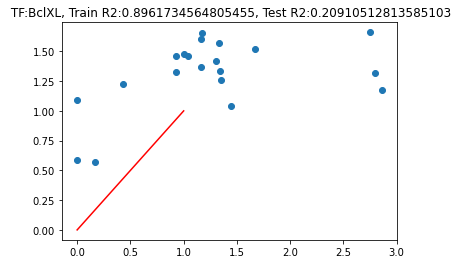

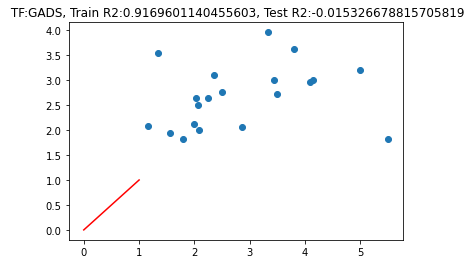

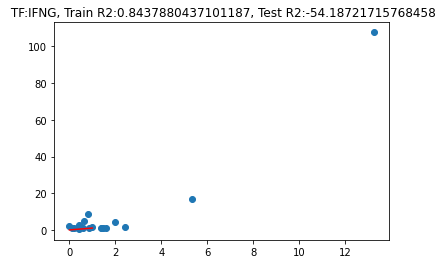

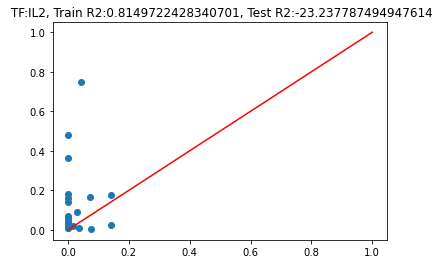

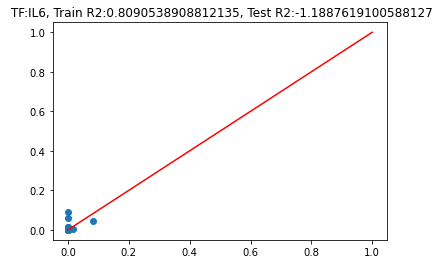

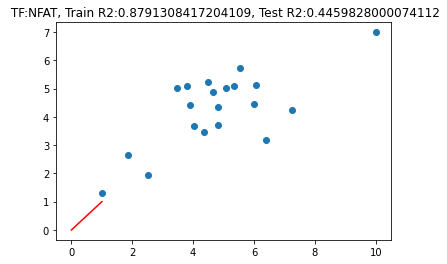

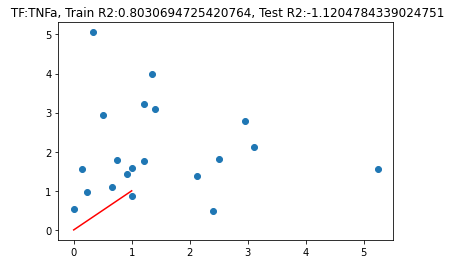

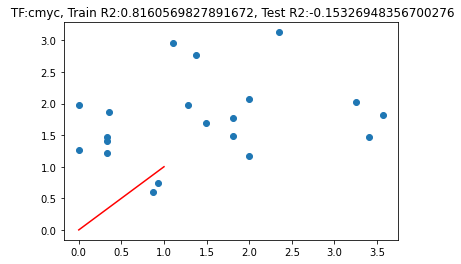

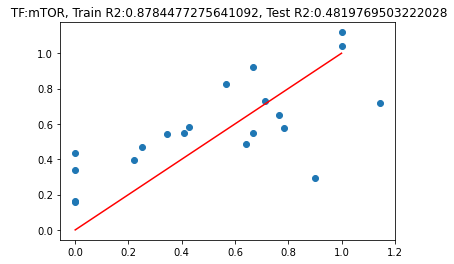

In [32]:
fit_random_forest(TFs=TFs,expression_train=data_train,
                  expression_valid=data_test, predictors_dict = parent_dict,
                  plot=True)

In [33]:
plt.close("all")

In [34]:
def fit_linreg(TFs, predictors_dict, expression_train, expression_valid, plot = False):
    """ Fit a random forest to each TF and create a dictionary to save the results."""
    score_dict = {}
    unfit = []
    for tf in TFs:
        print(tf)
        rf = LinearRegression()

        
        try:
            predictors = predictors_dict[tf]
            # Train the forest
            rf.fit(X = expression_train[predictors],
                   y = expression_train[tf])
            
        except BaseException as e:
            print(f"{tf} could not be fit")
            print(e)
            unfit.append(tf)
            continue

        ## For each model that was fit: predict and assess fit on the training and validation set
        ypred_test = rf.predict(expression_valid[predictors])
        ypred_train = rf.predict(expression_train[predictors])



        score_train = r2_score(y_true=expression_train[tf],
                                             y_pred = ypred_train)
        score_test = r2_score(y_true=expression_valid[tf],
                                             y_pred = ypred_test)
        score_dict[tf] = (score_train, score_test)

        if plot:
            plt.figure()
            plt.scatter(x = expression_valid[tf], y = ypred_test)
            X = np.linspace(0,1)
            plt.plot( X, X, "r")
            plt.title( f" TF:{tf}, Train R2:{score_train}, Test R2:{score_test}")
        else:
            print(f" TF:{tf}, Train R2:{score_train}, Test R2:{score_test}")




    return(score_dict, unfit)

ATF1
ATF2
BCL3
CEBPB
CEBPZ
E2F4
ELK1
ELK4
ESR1
ETS1
FOS
FOSL1
FOSL2
GABPA
GATA1
GATA2
HSF1
IRF3
JUN
JUND
MEF2A
MEF2C
MYC


/tmp/ipykernel_1162609/748603046.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


NANOG
NFAT
NFATC1
REST
RXRA
SP1
STAT1
STAT3
STAT5
TAL1
AP1
AP1 could not be fit
'AP1'
Bcl2
BclXL
GADS
IFNG
IL2
IL6
NFAT
TNFa
cmyc
mTOR


({'ATF1': (0.5233782005423968, 0.11744040542024736),
  'ATF2': (0.4156126174959639, 0.06263887567368598),
  'BCL3': (0.5397693396503707, -0.19162642431723387),
  'CEBPB': (0.09569612837960895, 0.11097257802473237),
  'CEBPZ': (0.4136281618236629, -0.01828017959806716),
  'E2F4': (0.5330068815184664, 0.39345917611317516),
  'ELK1': (0.3486912354882742, 0.33859927842606163),
  'ELK4': (0.5259366487990214, 0.3848188186379895),
  'ESR1': (0.2970525733558138, -0.10141343273495251),
  'ETS1': (0.7106332433524286, 0.5255341038325888),
  'FOS': (0.15850910809264407, -0.6038512686753124),
  'FOSL1': (0.19449059317074435, -0.17055736397230792),
  'FOSL2': (0.29205931321642575, 0.3451774232920809),
  'GABPA': (0.3960577080674601, -0.16365316665088248),
  'GATA1': (1.0, 1.0),
  'GATA2': (0.3121761628791705, 0.12097672830359474),
  'HSF1': (0.5140131655117393, 0.6601247365654359),
  'IRF3': (0.6351070037150425, -0.0944399271259655),
  'JUN': (0.3137946659755271, 0.03112670052363098),
  'JUND': (0.3

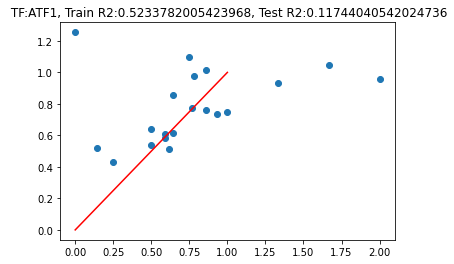

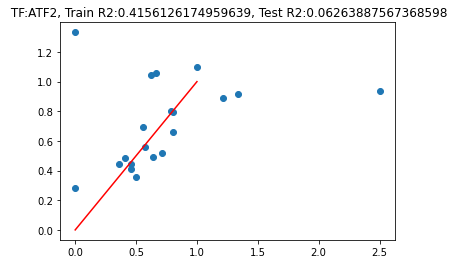

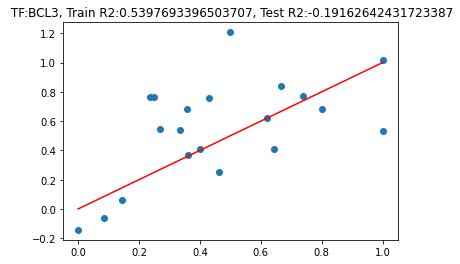

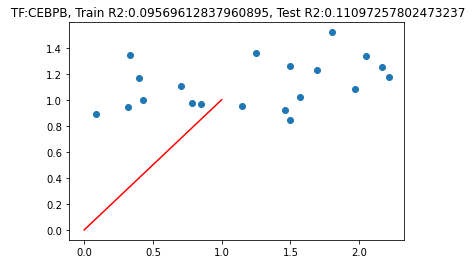

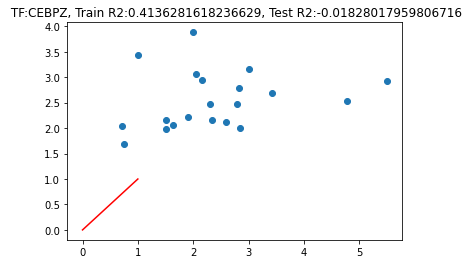

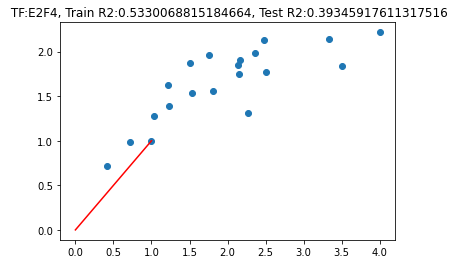

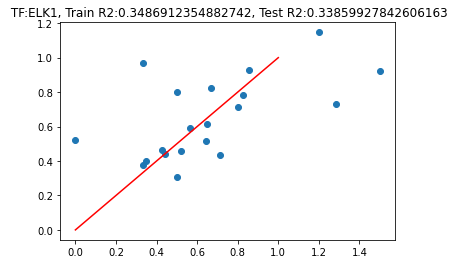

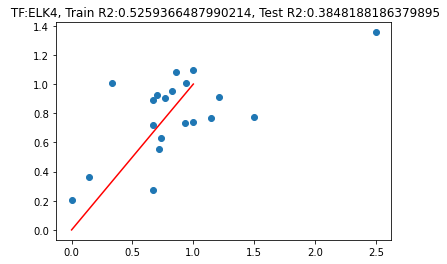

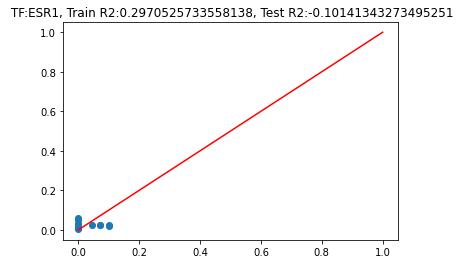

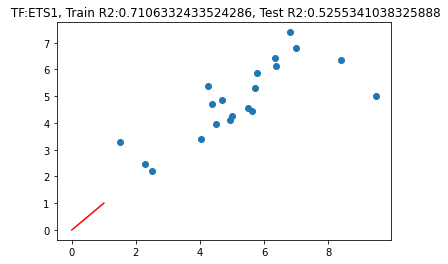

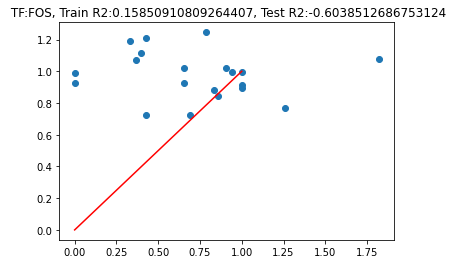

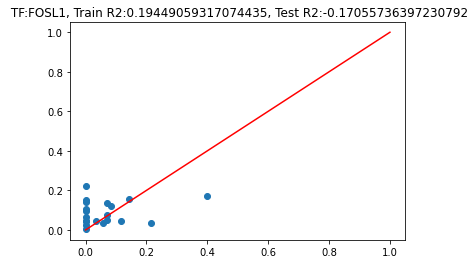

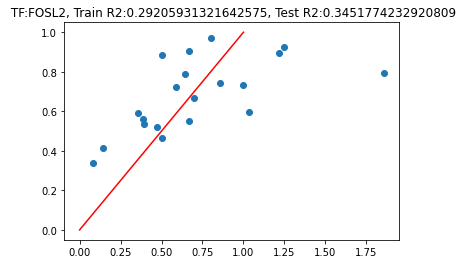

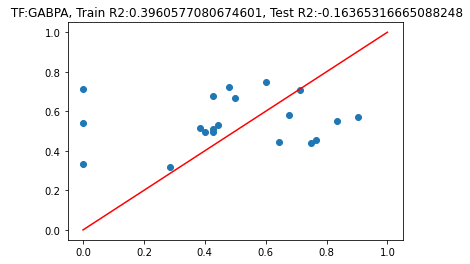

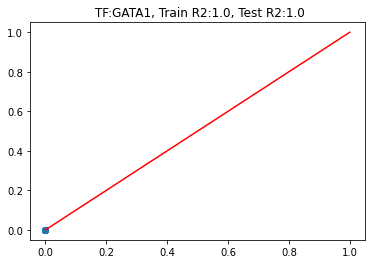

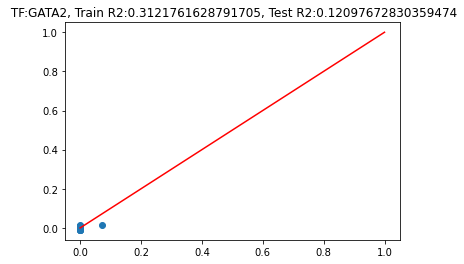

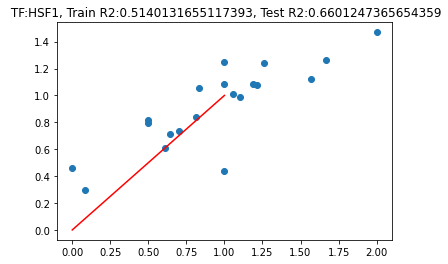

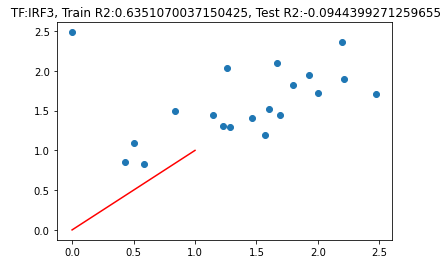

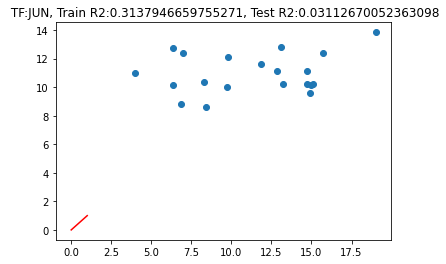

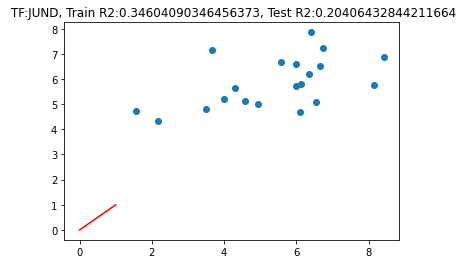

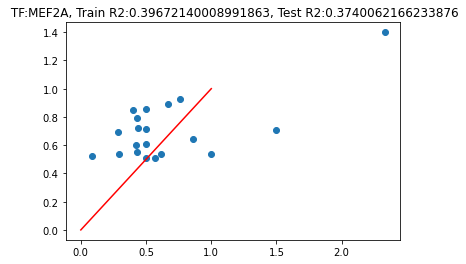

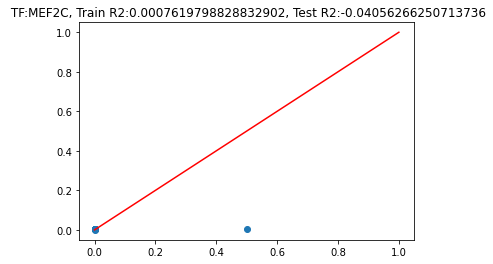

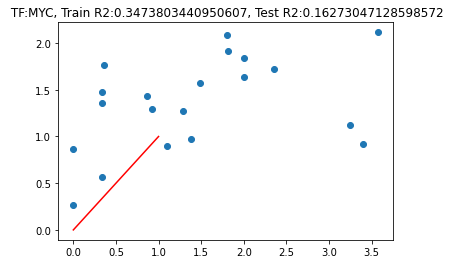

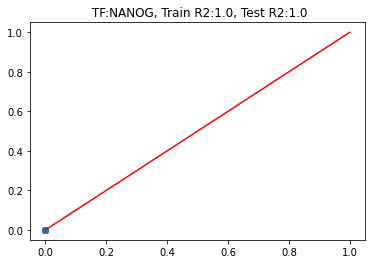

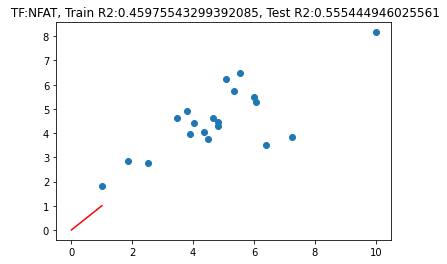

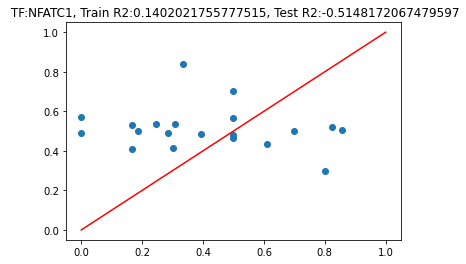

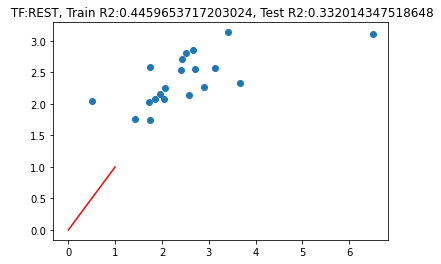

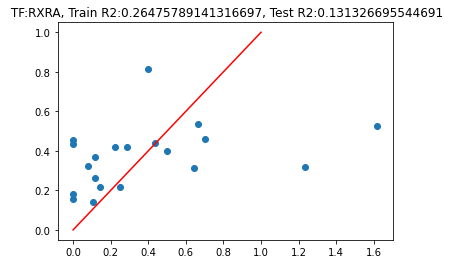

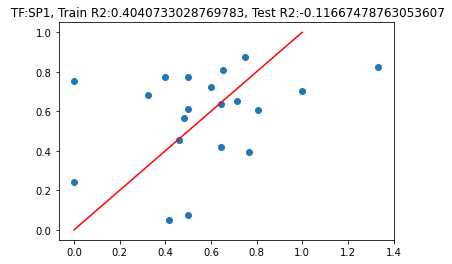

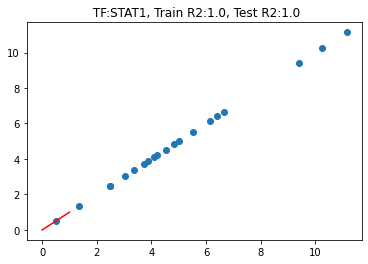

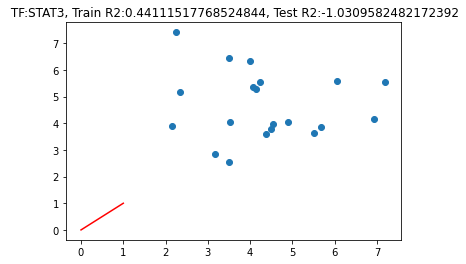

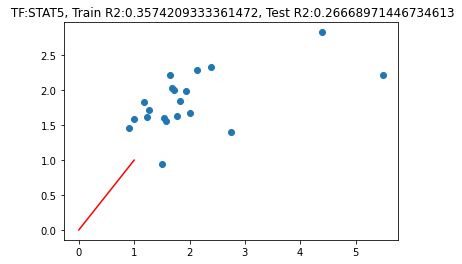

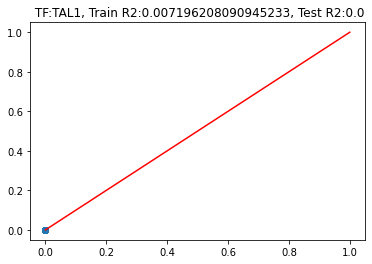

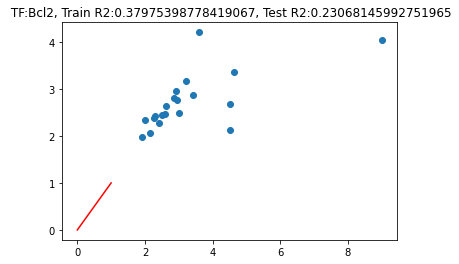

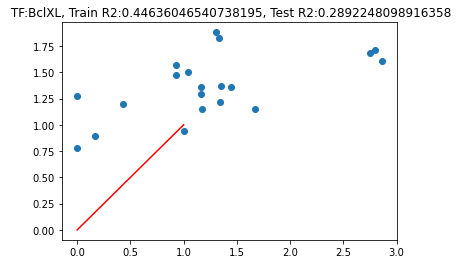

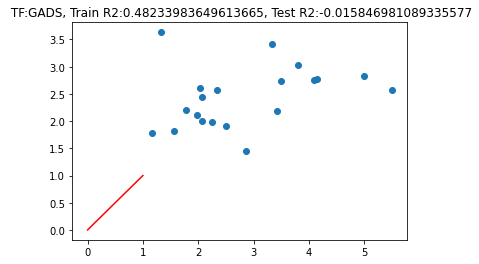

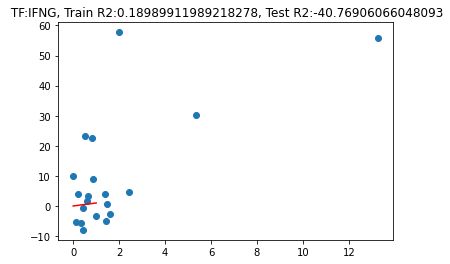

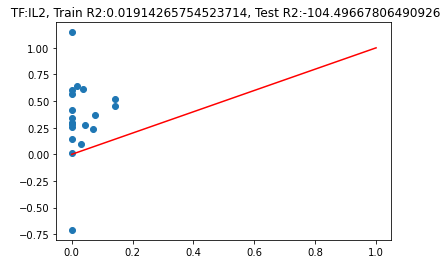

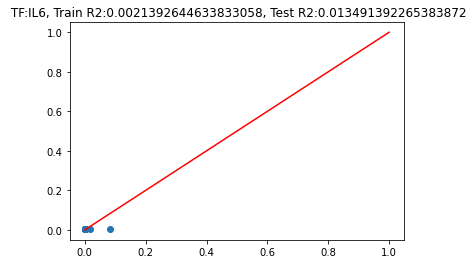

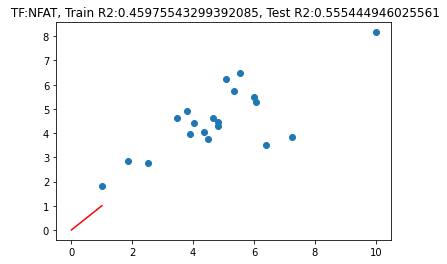

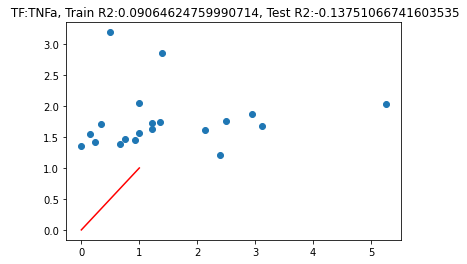

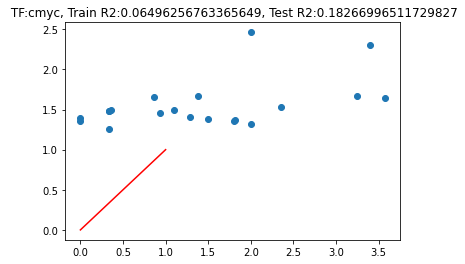

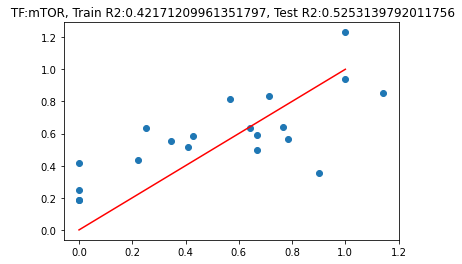

In [35]:
fit_linreg(TFs=TFs,expression_train=data_train,
                  expression_valid=data_test, predictors_dict = parent_dict,
                  plot=True)

In [36]:
plt.close("all")

In [37]:
# Test: plot a regression between 2 things that have nothing in common
# A household gene: "ACTB","RPS18","UBE2D2","RPLP0","B2M","PTPRC" and the parents of ATF2

fake_parents_dict = {"ATF2": parent_dict["ATF2"],
                     "ACTB": parent_dict["ATF2"],
                    "RPS18":parent_dict["ATF2"],
                    "UBE2D2": parent_dict["ATF2"],
                    "RPLP0":parent_dict["ATF2"],
                    "B2M": parent_dict["ATF2"],
                    "PTPRC":parent_dict["ATF2"]}



ATF2
ACTB
RPS18
UBE2D2
RPLP0
B2M
PTPRC


({'ATF2': (0.6899692955239164, -0.26794634762132263),
  'ACTB': (0.869296510003526, 0.5714527660359443),
  'RPS18': (0.8820021188502479, 0.129654568967849),
  'UBE2D2': (0.8583362410426256, 0.37781927476428734),
  'RPLP0': (0.8938172906605667, 0.31336337794465075),
  'B2M': (0.8801850292086881, -0.004838397686507179),
  'PTPRC': (0.7747815842231587, 0.12937547997092547)},
 [])

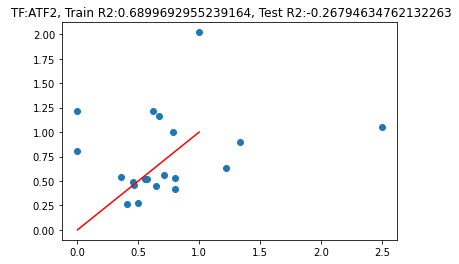

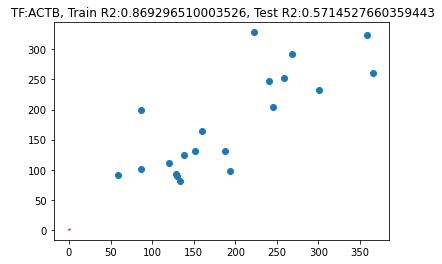

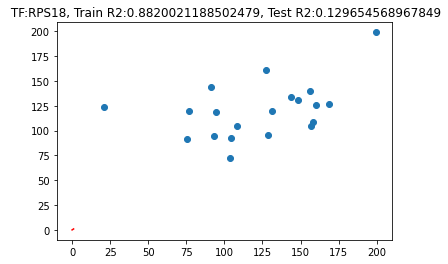

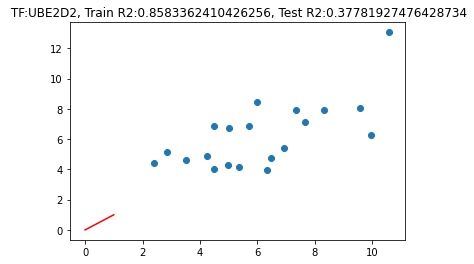

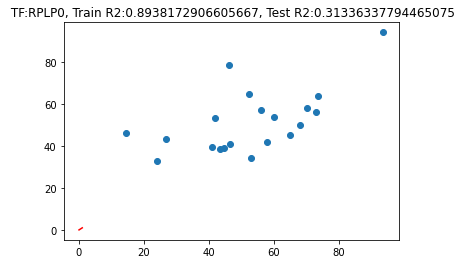

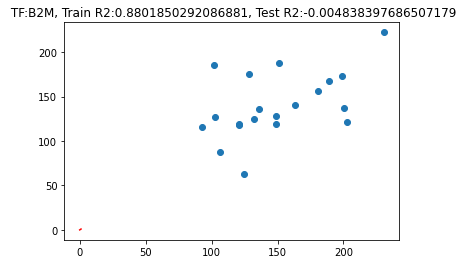

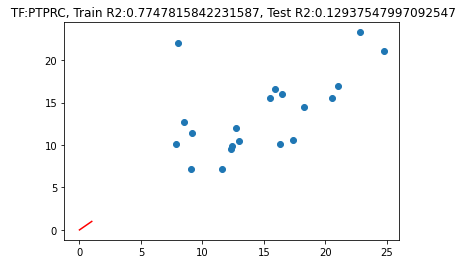

In [38]:
fit_random_forest(TFs=[gene for gene in fake_parents_dict.keys()],expression_train=data_train,
                  expression_valid=data_test, predictors_dict = fake_parents_dict,
                  plot=True)

In [39]:
plt.close("all")

ATF2
ACTB
RPS18
UBE2D2
RPLP0
B2M
PTPRC


({'ATF2': (0.4156126174959639, 0.06263887567368598),
  'ACTB': (0.6367641820102045, 0.6167834010719154),
  'RPS18': (0.6537087126019273, 0.35637207353285916),
  'UBE2D2': (0.6262959179167574, 0.636623978591387),
  'RPLP0': (0.7037319919796179, 0.5491787357973807),
  'B2M': (0.672197728210816, 0.1497037743774532),
  'PTPRC': (0.43911732902917255, 0.4359995788813864)},
 [])

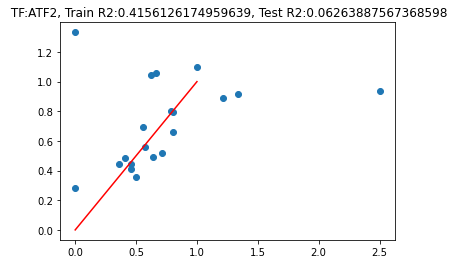

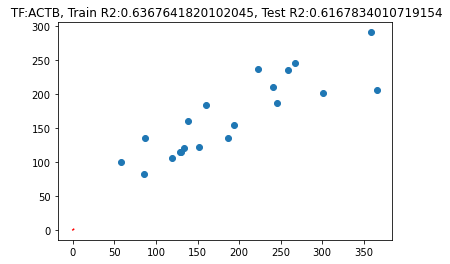

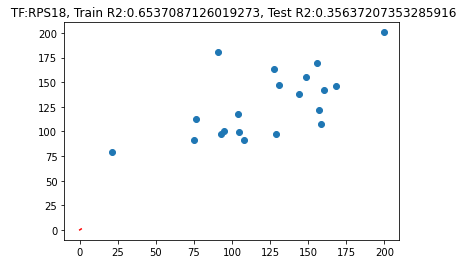

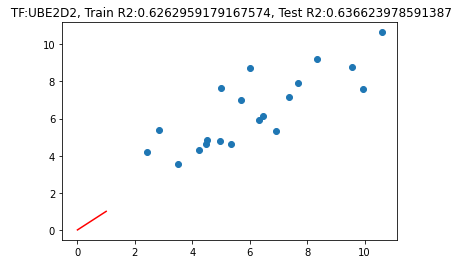

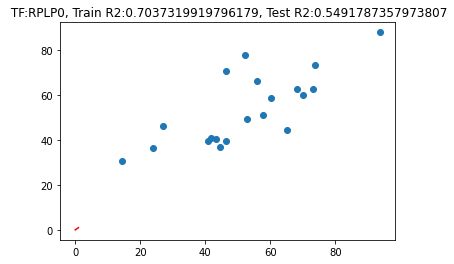

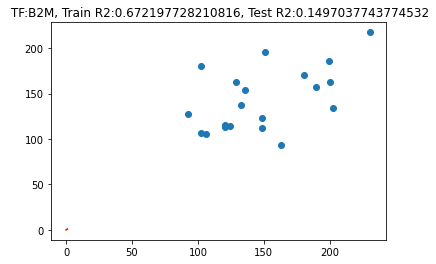

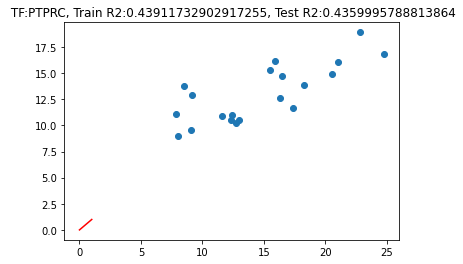

In [40]:
fit_linreg(TFs=[gene for gene in fake_parents_dict.keys()],expression_train=data_train,
                  expression_valid=data_test, predictors_dict = fake_parents_dict,
                  plot=True)


In [41]:
plt.close("all")

In [42]:
fake_parents_dict = {"ATF2": ["Akt", "Lck"],
                     "ACTB": ["Akt", "Lck"],
                    "RPS18": ["Akt", "Lck"],
                    "UBE2D2": ["Akt", "Lck"],
                    "RPLP0":["Akt", "Lck"],
                    "B2M": ["Akt", "Lck"],
                    "PTPRC":["Akt", "Lck"]}




ATF2
ACTB
RPS18
UBE2D2
RPLP0
B2M
PTPRC


({'ATF2': (0.5054828894186394, -0.36099061314767367),
  'ACTB': (0.8164062858595076, 0.7340543607828739),
  'RPS18': (0.5682572090218546, 0.4231393331894472),
  'UBE2D2': (0.6613446138218577, 0.7073325913340789),
  'RPLP0': (0.6285572769090766, 0.7450143944553215),
  'B2M': (0.7202812498081701, 0.5226358744052886),
  'PTPRC': (0.6640416909463953, 0.33689823919470385)},
 [])

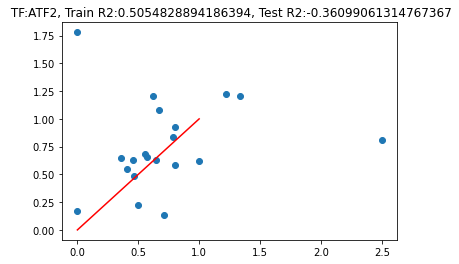

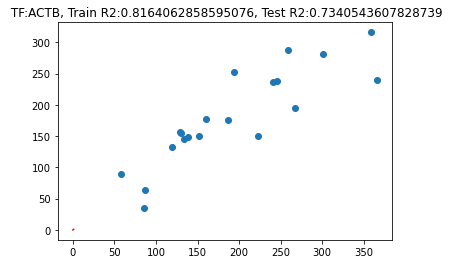

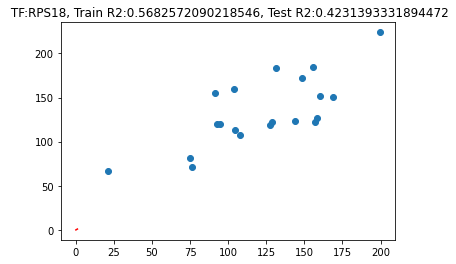

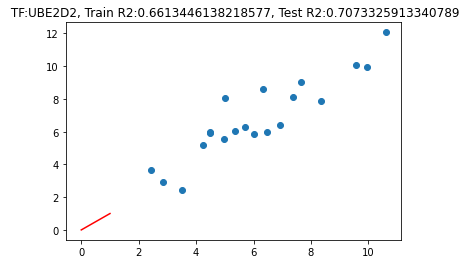

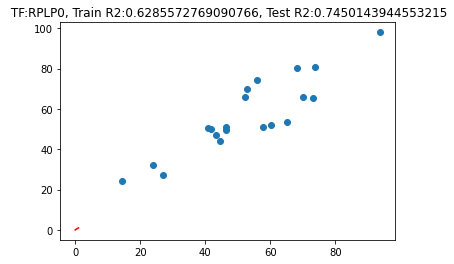

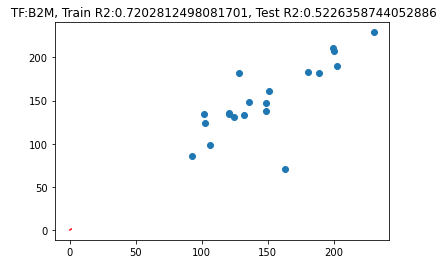

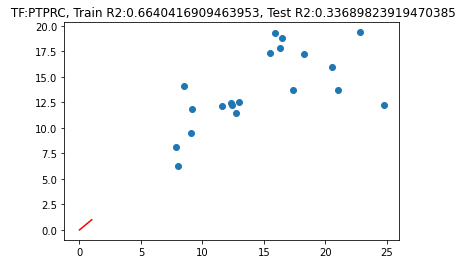

In [43]:
fit_linreg(TFs=[gene for gene in fake_parents_dict.keys()],expression_train=data_train,
                  expression_valid=data_test, predictors_dict = fake_parents_dict,
                  plot=True)



In [44]:
plt.close("all")

In [45]:
# Kendall's Tau
print(bulked_df["ATF2"].corr(bulked_df["Akt"]))

# Kendall's Tau
print(bulked_df["ATF2"].corr(bulked_df["Lck"]))




0.5533363008015191
0.5970084739051371


In [46]:
# Kendall's Tau
print(bulked_df["RPS18"].corr(bulked_df["Akt"]))

# Kendall's Tau
print(bulked_df["RPS18"].corr(bulked_df["Lck"]))




0.5415743654701995
0.705904512372661


In [47]:
# Kendall's Tau
print(raw_counts["ATF2"].corr(raw_counts["Akt"]))

# Kendall's Tau
print(raw_counts["RPS18"].corr(raw_counts["Lck"]))





0.20267113435592574
0.5330824514407826


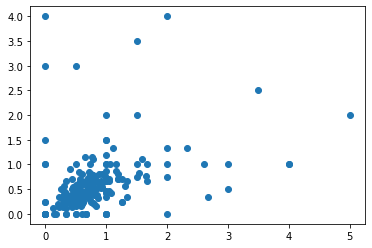

In [48]:
# Akt -> mtor

plt.scatter(bulked_df["Akt"], bulked_df["mTOR"])